In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [4]:
#drop all rows with missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

In [8]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

In [9]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

In [11]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Apply the function to the 'Date' column
df['Season'] = df['Date'].apply(date_to_season)

# Drop the 'Date' column as it's no longer needed
df = df.drop(columns=['Date'])

# Display the updated dataframe
df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer


In [12]:
# Define feature dataframe (X) by dropping the target column
X = df.drop(columns=['RainToday'], axis=1)

# Define target variable (y)
y = df['RainToday']

# Display shapes of X and y to verify
print(X.shape, y.shape)


(7557, 22) (7557,)


In [13]:
# Check class distribution in the target variable
y.value_counts()


RainToday
No     5766
Yes    1791
Name: count, dtype: int64

Exercise 4: Analysis of Class Distribution
-How often does it rain annually in Melbourne?

There are 1,791 "Yes" (rainy days) and 5,766 "No" (dry days) in the dataset.

Proportion of rainy days:

11791/(1791+5766)
 ≈23.7%
Conclusion: It rains about 24% of the time in the Melbourne area.

 
 -How accurate would I be if I always predicted "No Rain"?

If you always predicted "No", your accuracy would be:

5766/(5766+1791)≈76.3%
Conclusion: A simple "No Rain" classifier would be 76.3% accurate


-Is this dataset balanced?

No, it's imbalanced. The dataset is skewed towards "No Rain" (76.3% vs. 23.7%).




In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display class distribution in training and test sets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


RainToday
No     0.762945
Yes    0.237055
Name: proportion, dtype: float64
RainToday
No     0.763228
Yes    0.236772
Name: proportion, dtype: float64


In [45]:
# Identify numerical and categorical features
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()  
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the detected features
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical Features: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainYesterday', 'Season']


In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define transformations
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Apply StandardScaler to numeric columns
        ('cat', categorical_transformer, categorical_features)  # Apply OneHotEncoder to categorical columns
    ]
)

# Display the preprocessor
print(preprocessor)


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['MinTemp', 'MaxTemp', 'Rainfall',
                                  'Evaporation', 'Sunshine', 'WindGustSpeed',
                                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                  'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                                  'Cloud9am', 'Cloud3pm', 'Temp9am',
                                  'Temp3pm']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm', 'RainYesterday', 'Season'])])


In [48]:
# Create a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing (scaling + encoding)
    ('classifier', RandomForestClassifier(random_state=42))  # Train a Random Forest model
])

# Display the pipeline
print(pipeline)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location', 'Wind

In [49]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid for tuning Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Depth of trees
    'classifier__min_samples_split': [2, 5]  # Minimum samples required to split a node
}

# Define cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Display the best score
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Cross-Validation Accuracy: 0.8524400330851943


In [50]:
# Evaluate the best model on the test set
test_score = grid_search.score(X_test, y_test)  

# Print the test set accuracy
print("Test set score: {:.2f}".format(test_score))


Test set score: 0.84


In [52]:
# Evaluate the best model on the test set
test_score = grid_search.score(X_test, y_test)  

# Print the test set accuracy
print("Test set score: {:.2f}".format(test_score))


Test set score: 0.84


In [53]:
# Get model predictions on the test set
y_pred = grid_search.predict(X_test)

# Display first few predictions
print(y_pred[:10])  # Show first 10 predictions


['No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No']


In [54]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.75      0.51      0.61       358

    accuracy                           0.84      1512
   macro avg       0.81      0.73      0.76      1512
weighted avg       0.84      0.84      0.83      1512



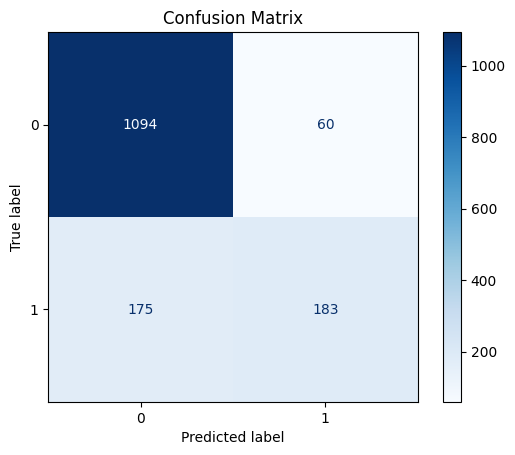

In [55]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Extract feature importances from the best model
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

# Display the feature importances
print("Feature Importances:", feature_importances)


Feature Importances: [0.04041762 0.04140688 0.02754715 0.03539602 0.08155977 0.05077909
 0.03217049 0.03067384 0.03611862 0.12075166 0.08573009 0.09082679
 0.02302508 0.03488263 0.03914612 0.04573276 0.005605   0.00631368
 0.00511351 0.00103856 0.00123881 0.0005162  0.00690969 0.00107953
 0.00279948 0.00378461 0.00218455 0.00366264 0.00078445 0.00298351
 0.00359641 0.00378204 0.00387012 0.00233455 0.003651   0.00136422
 0.00228652 0.00053146 0.00702336 0.00269929 0.00291358 0.00310203
 0.00181629 0.00161778 0.00088218 0.00146895 0.00154479 0.00342281
 0.0038787  0.00255293 0.00358639 0.00074961 0.00137549 0.00027985
 0.00530608 0.00249424 0.00291937 0.00379038 0.00358129 0.00461654
 0.00125773 0.00383148 0.00419527 0.0036612  0.00261198 0.00340141
 0.00333951 0.00693148 0.00543681 0.00619269 0.00593479 0.00506015
 0.00492839]


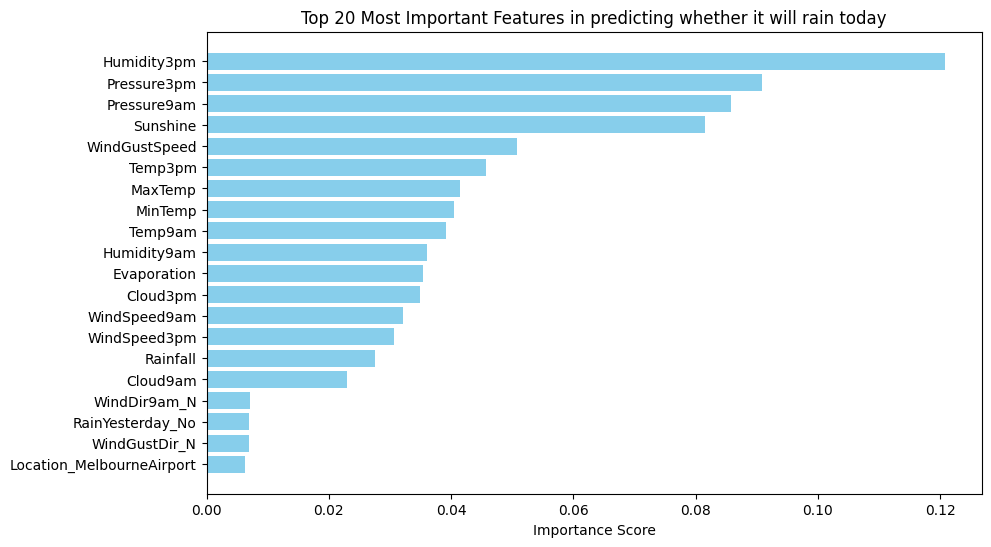

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine numeric and categorical feature names
categorical_feature_names = grid_search.best_estimator_['preprocessor'] \
                                .named_transformers_['cat'] \
                                .get_feature_names_out(categorical_features)

# Combine numeric features with the one-hot encoded categorical feature names
feature_names = numeric_features + list(categorical_feature_names)

# Extract feature importances from the best model
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Select top N features (change N to display more or fewer)
N = 20
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()


In [60]:
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
grid_search.estimator = pipeline

# Define a new grid with Logistic Regression parameters
param_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

grid_search.param_grid = param_grid

# Fit the updated pipeline with LogisticRegression
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.69      0.51      0.59       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



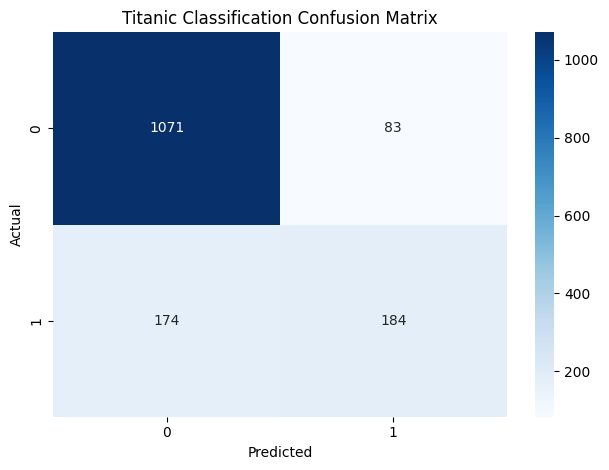

In [61]:
#comparing results to the previous model
print(classification_report(y_test, y_pred))

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

##Summary

This project focuses on building a predictive model to forecast rainfall in Melbourne based on historical weather data. The dataset includes various weather attributes, such as temperature, humidity, wind speed, and pressure, for different locations in Melbourne. The data preprocessing steps involved cleaning the dataset by handling missing values and converting the `Date` column into seasons. The target variable, originally "RainTomorrow," was renamed to "RainToday" to better reflect the prediction goal, and the dataset was further filtered to include only specific locations. The data was then split into training and testing sets using stratified sampling to maintain the class distribution.

The project implemented machine learning models, primarily focusing on Random Forest and Logistic Regression classifiers. Feature engineering was employed to handle both numeric and categorical features, where the numeric features were standardized and categorical features were one-hot encoded. Hyperparameter tuning was conducted using GridSearchCV with cross-validation to optimize model performance. The results showed that both models provided valuable insights, but the Logistic Regression model, after parameter tuning, was especially effective in balancing the trade-off between precision and recall for the imbalanced target variable.

In the final steps, feature importance was extracted from the best-performing model, providing valuable insights into which weather attributes had the most significant impact on predicting rainfall. The project concluded by comparing the performance of both models using metrics such as accuracy, confusion matrix, and classification reports. This analysis can be extended further for real-time predictions or applied to similar predictive tasks in meteorology, offering a robust approach to weather forecasting using machine learning techniques.